# Introduction

The following data source [Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I plan to use these data to answer the following questions. 

Additional sub-questions will be answered throughout the notebook as well to further the analysis of the data and explain the graphs that were developed. 

Tasks:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Important**

As you scroll through the notebook, some cells may be collapsed. Click on the little arrow on the upper left corner to expand the cell and view the results of the code.

<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Exploration

How many different colours does the LEGO company produce? 

In [ ]:
colors_df = pd.read_csv('colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
colors_df.shape

(135, 4)

In [ ]:
x = colors_df.nunique(axis=0, dropna=True)['name']

print('lego company produces: ' + str(x) + ' different colors')

lego company produces: 135 different colors


Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. 

In [ ]:
#brute force
trans_count = 0
opaque_count = 0
for boolean in colors_df['is_trans']:
  if boolean == 't':
    trans_count = trans_count + 1
  else:
    opaque_count = opaque_count + 1

print("transparent count: " + str(trans_count))
print("opaque count: " + str(opaque_count))

transparent count: 28
opaque count: 107


In [ ]:
#using pandas methods groupby
colors_df.groupby(['is_trans']).count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [ ]:
#using pandas method value_counts()
colors_df['is_trans'].value_counts()

f    107
t     28
Name: is_trans, dtype: int64


<h3>Themes vs. LEGO Sets</h3>

LEGO store has their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.


In [ ]:
sets_df = pd.read_csv('sets.csv')

In [ ]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In which year were the first LEGO sets released and what were these sets called?

In [ ]:
sets_df.sort_values(by='year').head()

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


The first lego sets were released in 1949. 
1. Extra-Large Gift Set (ABB)	
2. Large Gift Set (ABB)
3. Medium Gift Set (ABB)
4. Small Brick Set (ABB)
5. Small Doors and Windows Set (ABB)

 How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [ ]:
sets_df[sets_df['year'] == 1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [ ]:
sets_df[sets_df['year'] == 1949].nunique(axis=0)

set_num      5
name         5
year         1
theme_id     2
num_parts    4
dtype: int64

The company sold 5 different lego sets in their first year. 

Find the top 5 LEGO sets with the most number of parts. 

In [ ]:
sets_df.sort_values(by='num_parts', ascending=False).head(5)


,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


 How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [ ]:
num_sets_year_df = sets_df.groupby('year').count()[:-2]
num_sets_year_df.tail()

,set_num,name,theme_id,num_parts
year,,,,
2015,774,774,774,774
2016,757,757,757,757
2017,786,786,786,786
2018,816,816,816,816
2019,840,840,840,840


In [ ]:
print(num_sets_year_df['set_num'][num_sets_year_df.index == 1949])
print(num_sets_year_df['set_num'][num_sets_year_df.index == 2019])

year
1949    5
Name: set_num, dtype: int64
year
2019    840
Name: set_num, dtype: int64


In 1949 Lego it released a total of 5 sets and in 2019 it released a total of 840 sets. A difference of 835 sets. 

The graph below shows the time series of # of sets released per year. 

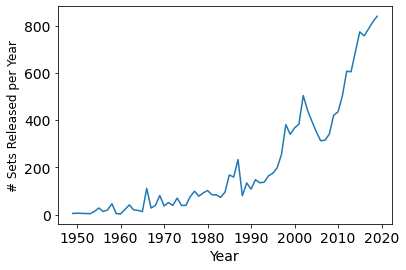

In [ ]:
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('# Sets Released per Year', fontsize=12)
plt.plot(num_sets_year_df.index, num_sets_year_df['set_num'])

From the plot above we can see that while the first 45 years or so, LEGO had some steady growth in its product offering, it was really in the mid-1990s that the number of sets produced by the company increased dramatically. 

### Aggregate Data with the Python .agg() Function

Number of different themes shipped by year.

In [ ]:
themes_by_year_df = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})[0:-2]
themes_by_year_df.tail()


,theme_id
year,
2015,98
2016,92
2017,89
2018,93
2019,78


The plot below includes the number of themes released by year as a line chart.

Text(0, 0.5, '# Themes Released per Year')

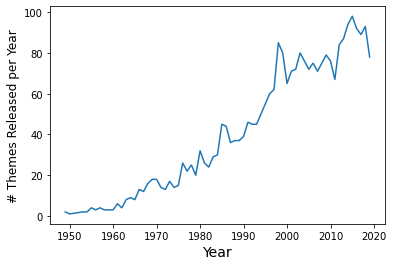

In [ ]:
plt.plot(themes_by_year_df.index, themes_by_year_df['theme_id'])
plt.xlabel('Year', fontsize=14)
plt.ylabel('# Themes Released per Year', fontsize=12)


In the chart above, we can see that LEGO has pretty consistently added more and more themes until the mid-1990s. From then the number of themes stagnated for around 10 years or so until the early 2010s.

### Line Charts with Two Seperate Axes

The line chart below plots both the # of sets and # of themes released by year.

Text(0, 0.5, '# of Sets per Year')

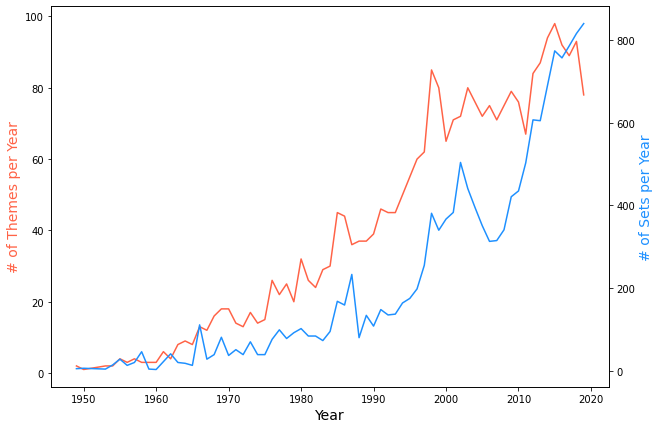

In [ ]:
fig, ax1 = plt.subplots()
ax2 = plt.twinx()
fig.set_size_inches(10,7)
ax1.plot(themes_by_year_df.index, themes_by_year_df['theme_id'], color='tomato')
ax2.plot(num_sets_year_df.index, num_sets_year_df['set_num'], color='dodgerblue')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('# of Themes per Year', color='tomato', fontsize=14)
ax2.set_ylabel('# of Sets per Year', color='dodgerblue', fontsize=14)


The plot above shows that there is a direct relation between the number themes offered and the number of sets produced per year.

In the mid 1990s lego dramatically increased the themes offered and that is when the number of sets produced also started to increase dramatically.

Additionally, all the way back in 1965 we can see that is when Lego first increased the number of themes offered. Then, gradually and with a lag, the number of sets also starts to increase. This lag in growth shows that the increase in number of themes led to the increase in sets produced and not the other way around. 

 How many parts did the average LEGO set released in 1954 compared to 2017?

In [ ]:
sets_df.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [ ]:
average_parts_df = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})
average_parts_df.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


In [ ]:
average_parts_df.tail()

,num_parts
year,
2017,221.840967
2018,213.618873
2019,207.510714
2020,259.732938
2021,0.000000


In 1949, lego sets on average contained around 100 parts and in 2017 an average of around 200 parts. 

### Scatter Plots in Matplotlib

Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot.

Text(0, 0.5, 'Average # Parts in Lego Sets per Year')

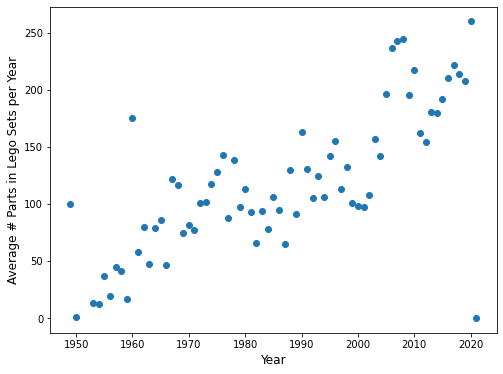

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(average_parts_df.index, average_parts_df.num_parts)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average # Parts in Lego Sets per Year', fontsize=12)

From the chart, we can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what average LEGO set used to contain in the 1960s.

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. Which theme has the largest number of individual sets? 

In [ ]:
most_popular_theme_series = sets_df.theme_id.value_counts()
most_popular_theme_series.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [ ]:

most_popular_theme_series.idxmax()

158

In [ ]:
most_popular_theme_series.head()

158    753
501    656
494    398
435    356
503    329
Name: theme_id, dtype: int64

In [ ]:
sets_df[sets_df['theme_id'] == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


The id of the most popular theme is id #158. 

We will have to use the **themes** database to find out what is the name of the theme that has an id #158. 

Below I have inserted the database schema of the lego database. So far we have been using the **sets** database and that is where we extracted the most popular theme id. 

Now we must use the **themes** database to search for the name of the theme. 

Lego database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">


### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

Exploring the themes.csv. 
How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [ ]:
themes_df = pd.read_csv('themes.csv')
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
themes_df[themes_df.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
sets_df[sets_df['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [ ]:
sets_df[sets_df['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
set_theme_count = pd.DataFrame({"id": most_popular_theme_series.index, "set_count": most_popular_theme_series.values})

In [ ]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [ ]:
merged_df = pd.merge(set_theme_count, themes_df, on='id')
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


After merging the dataframes we can see that the theme id #158 corresponds to the theme name: Star Wars. That is the theme with the most sets, 753 sets in total corresponding to that theme.

<BarContainer object of 10 artists>

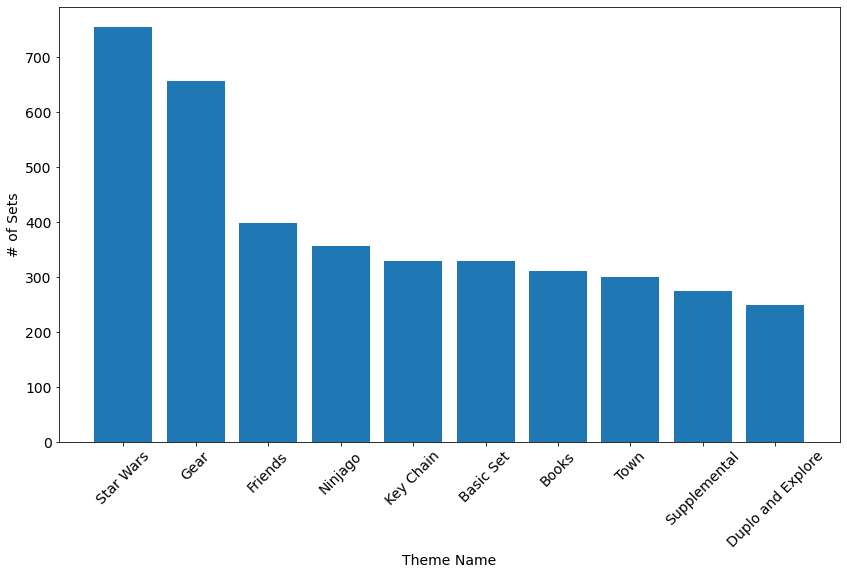

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('# of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)
 
plt.bar(merged_df.name[:10], merged_df.set_count[:10])


The bar chart above plots the top ten themes. 

So what can we see here? 
Well, a couple of these themes like Star Wars, Town, or Ninjago are what I would think of when I think of LEGO. However, it looks like LEGO also produces a huge number of books and key chains. This shows how Lego is producing more than just movie or videogame related themes and has diversified from its core business ideas.  



##Initial Tasks Answered:

1. What is the most enormous LEGO set ever created and how many parts did it have?

The largest LEGO set ever created is The Ultimate Battle for Chima and it has around 10,000 pieces. 

2. How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

The first lego sets were released in 1949. The company offered only 5 different lego sets when it first launched. 

3. Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?

The lego theme that has the most sets is Star Wars theme. 
 
4. When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?

From the plots above we can see that while the first 45 years or so, LEGO had some steady growth in its product offering, it was really in the mid-1990s that the number of sets produced by the company increased dramatically. In the mid-1990s it was also when they dramatically increased the number of themes released per year. This shows a positive relation between the number of themes released and the number of sets produced. 
 
5. Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?

We can definitely make out an upward trend in the size and complexity of the LEGO sets based on the average number of parts. In the 2010s the average set contained around 200 individual pieces, which is roughly double what the average LEGO set used to contain in the 1960s.
